In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_gen = ImageDataGenerator(
    rescale=1/255.0,
    horizontal_flip=True)

train_generator = train_gen.flow_from_directory(
    "/content/drive/My Drive/Calling Classification/train",
    target_size=(224,224),
    color_mode="rgb",
    batch_size = 32,
    class_mode='binary'
)

Found 151 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Calling': 0, 'Safe': 1}

In [ ]:
reverse_dict = { 0 : 'Calling', 1 :'Safe' }

In [ ]:
reverse_dict.items()

dict_items([(0, 'Calling'), (1, 'Safe')])

In [ ]:
test_gen = ImageDataGenerator(rescale=1/255.0,horizontal_flip=True)

test_generator = test_gen.flow_from_directory(
    "/content/drive/My Drive/Calling Classification/test",
    target_size=(224,224),
    color_mode="rgb",
    batch_size = 32,
    class_mode='binary'
)

Found 40 images belonging to 2 classes.


In [ ]:
def draw_image(img,label):
    plt.style.use("seaborn")
    plt.title(reverse_dict[label])
    plt.imshow(img)
    plt.show()

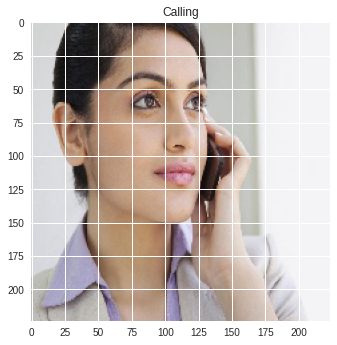

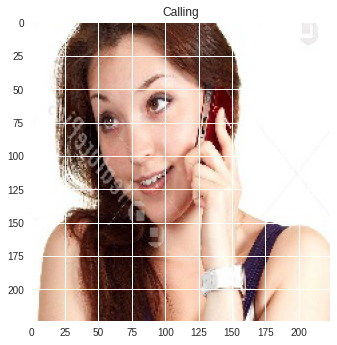

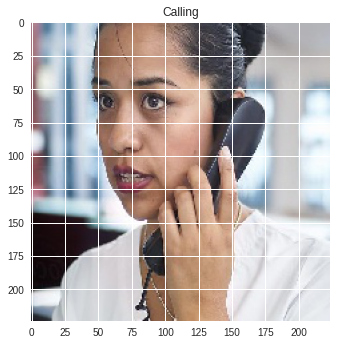

In [ ]:
x,y = train_generator.next()
for i in range(3):
    draw_image(x[i],y[i])

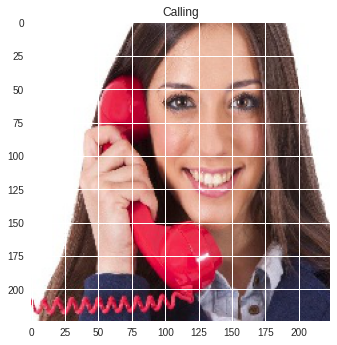

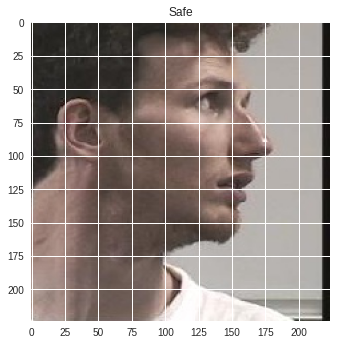

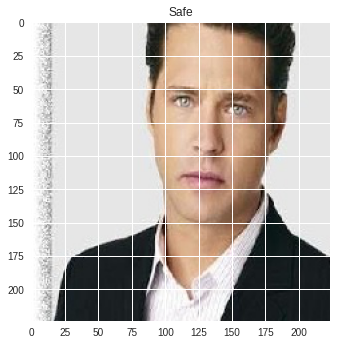

In [ ]:
x,y = test_generator.next()
for i in range(3):
    draw_image(x[i],y[i])

# CNN Model

In [ ]:
from keras.applications import MobileNetV2
from keras.layers import *
from keras.optimizers import Adam

# Keras API
from keras.models import Model

In [ ]:
model = MobileNetV2(input_shape=(224,224,3),include_top=False,weights='imagenet')

In [ ]:
dr = Dropout(0.45)(model.output)
gap1 = GlobalAveragePooling2D()(dr)
fc1 = Dense(1,activation='sigmoid')(gap1)

In [ ]:
model_new = Model(inputs=model.input,outputs=fc1)

In [ ]:
for ix in range(153):
    model_new.layers[ix].trainable= False

In [ ]:
adam = Adam(lr=0.001)

In [ ]:
model_new.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model_new.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________________

In [ ]:
from keras.callbacks import ModelCheckpoint

In [ ]:
checkpoint = ModelCheckpoint("/content/drive/My Drive/Calling Classification/modelzFlip.hdf5",monitor='val_loss',save_best_only=True)

hist = model_new.fit_generator(
    train_generator,
    steps_per_epoch = len(train_generator),
    epochs = 5,
    validation_data = test_generator,
    validation_steps = len(test_generator),
    callbacks=[checkpoint]
)

Epoch 1/5
5/5 [==============================] - 2s 349ms/step - loss: 0.6258 - accuracy: 0.6490 - val_loss: 0.5108 - val_accuracy: 0.8500
Epoch 2/5
5/5 [==============================] - 1s 172ms/step - loss: 0.4794 - accuracy: 0.8013 - val_loss: 0.3890 - val_accuracy: 0.9250
Epoch 3/5
5/5 [==============================] - 1s 195ms/step - loss: 0.3551 - accuracy: 0.9205 - val_loss: 0.3541 - val_accuracy: 0.8750
Epoch 4/5
5/5 [==============================] - 1s 191ms/step - loss: 0.2898 - accuracy: 0.9735 - val_loss: 0.3091 - val_accuracy: 0.9000
Epoch 5/5
5/5 [==============================] - 1s 200ms/step - loss: 0.2198 - accuracy: 0.9801 - val_loss: 0.2643 - val_accuracy: 0.9500
